In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"  

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, Dropout,  Input, Layer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.optimizers import Adam

from pandas_datareader import data

from PyEMD import EMD,EEMD,CEEMDAN,Visualisation

In [2]:
start = '2016-01-01'
end = '2021-01-01'
GSPC = pd.DataFrame(data.DataReader("^GSPC","yahoo",start,end)['Adj Close'])#Choose the data
print(GSPC)
GSPC.isnull().sum().sort_values(ascending = False)

              Adj Close
Date                   
2016-01-04  2012.660034
2016-01-05  2016.709961
2016-01-06  1990.260010
2016-01-07  1943.089966
2016-01-08  1922.030029
...                 ...
2020-12-24  3703.060059
2020-12-28  3735.360107
2020-12-29  3727.040039
2020-12-30  3732.040039
2020-12-31  3756.070068

[1259 rows x 1 columns]


Adj Close    0
dtype: int64

In [82]:
def emd_calculate(data,emdtype=EMD):
    EMD_C=emdtype()#EMD,EEMD,CEEMDAN
    imfs = EMD_C(data.values.reshape(len(data)))
    series_index = data.index
    fig = plt.figure(figsize=(16,2*len(imfs)))
    plt.subplot(1+len(imfs), 1, 1 )
    plt.plot(series_index, data, color='#0070C0') #F27F19 orange #0070C0 blue
    plt.ylabel('Original data')

    # Plot IMFs
    for i in range(len(imfs)):
        plt.subplot(1 +len(imfs),1,2 + i)
        plt.plot(series_index, imfs[i, :], color='#F27F19')
        plt.ylabel('IMF'+str(i))
    plt.show()
    imfs=pd.DataFrame(imfs,columns=data.index)
    return imfs

In [83]:
def reconstruction(data_emd):
    reconstruction = pd.DataFrame()
    for i in range(len(data_emd)):
        reconstruction['sum'+str(i)]=data_emd.iloc[i:,:].sum(axis=0)
    return reconstruction.T

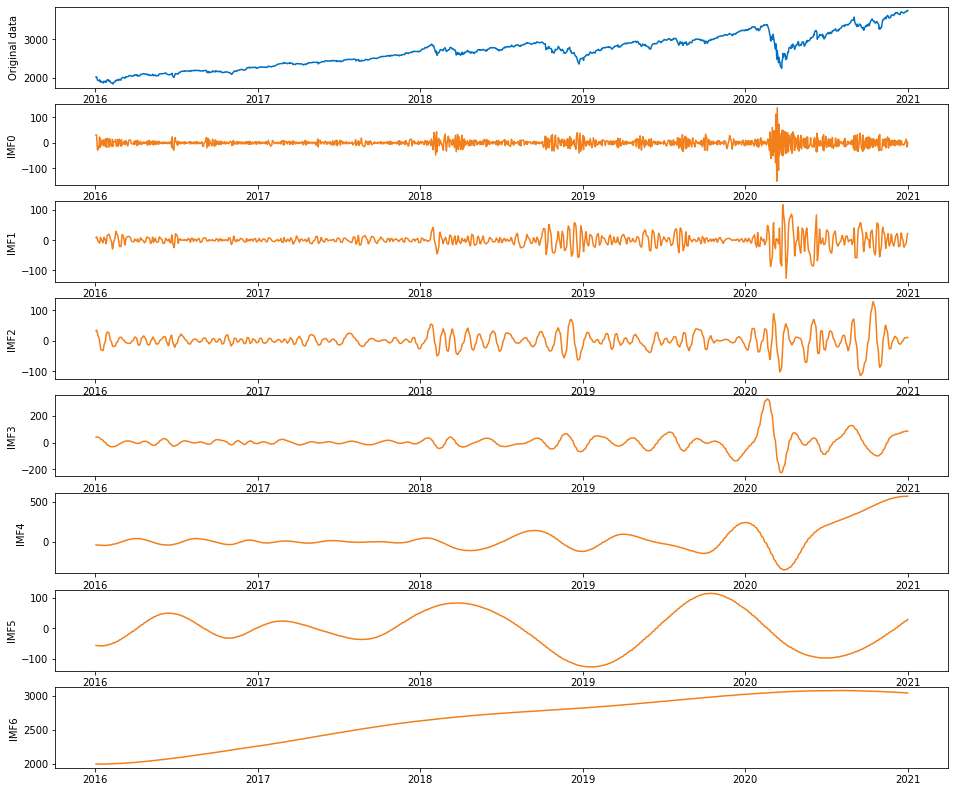

In [84]:
result=emd_calculate(GSPC)

In [34]:
decom=reconstruction(result)

In [36]:
decom

Date,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2020-12-31
sum0,2012.660034,2016.709961,1990.260010,1943.089966,1922.030029,1923.670044,1938.680054,1890.280029,1921.839966,1880.329956,...,3722.479980,3709.409912,3694.919922,3687.260010,3690.010010,3703.060059,3735.360107,3727.040039,3732.040039,3756.070068
sum1,1981.223354,1985.253952,1980.329099,1967.981322,1950.572907,1931.182463,1915.753883,1909.329200,1906.836568,1892.137754,...,3715.937893,3711.664709,3703.165032,3696.506972,3696.972281,3705.842239,3720.191561,3736.046207,3748.720560,3754.262172
sum2,1972.742465,1974.433890,1971.151279,1963.596598,1952.801309,1939.796871,1925.614746,1911.259335,1897.785600,1886.721238,...,3692.576162,3699.881874,3707.403160,3714.524239,3720.679650,3725.565136,3729.166461,3731.529313,3732.699378,3732.722344
sum3,1940.274321,1939.963056,1938.906058,1937.157233,1934.791408,1931.883407,1928.508059,1924.740187,1920.654619,1916.326181,...,3699.605250,3703.438884,3707.111637,3710.553938,3713.696215,3716.468899,3718.802417,3720.627199,3721.880457,3722.534846
sum4,1900.249069,1898.781179,1897.453203,1896.268504,1895.230411,1894.342247,1893.607337,1893.029002,1892.610566,1892.355352,...,3624.646988,3626.544210,3628.338542,3630.028099,3631.610993,3633.085338,3634.449247,3635.700832,3636.838208,3637.859850
sum5,1937.121881,1936.752937,1936.446000,1936.201895,1936.021450,1935.905492,1935.854846,1935.870341,1935.952802,1936.103057,...,3060.432493,3061.458926,3062.486270,3063.514410,3064.543231,3065.572618,3066.602457,3067.632633,3068.663031,3069.693536
sum6,1993.603207,1993.607553,1993.626974,1993.661519,1993.711240,1993.776186,1993.856408,1993.951935,1994.062713,1994.188664,...,3046.002522,3045.427155,3044.847084,3044.262324,3043.672893,3043.078806,3042.480080,3041.876730,3041.268773,3040.656226


In [31]:
result

Date,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,31.436680,31.456009,9.930911,-24.891356,-28.542878,-7.512419,22.926171,-19.049171,15.003398,-11.807798,...,6.542088,-2.254797,-8.245110,-9.246962,-6.962271,-2.782180,15.168546,-9.006168,-16.680521,1.807897
1,8.480889,10.820063,9.177820,4.384723,-2.228402,-8.614409,-9.860863,-1.930135,9.050968,5.416515,...,23.361731,11.782835,-4.238128,-18.017268,-23.707369,-19.722898,-8.974900,4.516894,16.021183,21.539828
2,32.468144,34.470833,32.245221,26.439365,18.009902,7.913464,-2.893313,-13.480852,-22.869020,-29.604943,...,-7.029088,-3.557009,0.291524,3.970302,6.983435,9.096238,10.364044,10.902114,10.818921,10.187497
3,40.025253,41.181877,41.452854,40.888729,39.560997,37.541160,34.900722,31.711185,28.044053,23.970829,...,74.958261,76.894674,78.773095,80.525839,82.085222,83.383561,84.353170,84.926367,85.042249,84.674996
4,-36.872812,-37.971758,-38.992796,-39.933392,-40.791040,-41.563244,-42.247509,-42.841339,-43.342236,-43.747705,...,564.214495,565.085283,565.852272,566.513689,567.067763,567.512720,567.846790,568.068199,568.175177,568.166314
5,-56.481326,-56.854616,-57.180974,-57.459624,-57.689790,-57.870695,-58.001562,-58.081594,-58.109911,-58.085608,...,14.429972,16.031772,17.639187,19.252086,20.870338,22.493812,24.122377,25.755903,27.394258,29.037311
6,1993.603207,1993.607553,1993.626974,1993.661519,1993.711240,1993.776186,1993.856408,1993.951935,1994.062713,1994.188664,...,3046.002522,3045.427155,3044.847084,3044.262324,3043.672893,3043.078806,3042.480080,3041.876730,3041.268773,3040.656226


In [37]:
GSPC

,Adj Close
Date,
2016-01-04,2012.660034
2016-01-05,2016.709961
2016-01-06,1990.260010
2016-01-07,1943.089966
2016-01-08,1922.030029
...,...
2020-12-24,3703.060059
2020-12-28,3735.360107
2020-12-29,3727.040039


In [78]:
def create_noisy(data,percentage=0.5,size=10):
    data_noisy = pd.DataFrame()
    window=int(len(data) * percentage)
    for i in range(window,len(data),size):
        data_noisy= pd.concat([data_noisy,pd.Series(data.values[i-window:i,0])], axis=1)
    return data_noisy.T

In [79]:
GSPC_noisy=create_noisy(GSPC)

In [80]:
GSPC_noisy

,0,1,2,3,4,5,6,7,8,9,...,619,620,621,622,623,624,625,626,627,628
0,2012.660034,2016.709961,1990.260010,1943.089966,1922.030029,1923.670044,1938.680054,1890.280029,1921.839966,1880.329956,...,2762.590088,2767.320068,2749.760010,2754.879883,2717.070068,2723.060059,2699.629883,2716.310059,2718.370117,2726.709961
0,1881.329956,1859.329956,1868.989990,1906.900024,1877.079956,1903.630005,1882.949951,1893.359985,1940.239990,1939.380005,...,2713.219971,2736.610107,2759.820068,2784.169922,2793.840088,2774.020020,2798.290039,2801.310059,2798.429932,2809.550049
0,1903.030029,1912.530029,1915.449951,1880.050049,1853.439941,1852.209961,1851.859985,1829.079956,1864.780029,1895.579956,...,2815.620117,2804.489990,2801.830078,2806.979980,2820.399902,2846.070068,2837.439941,2818.820068,2802.600098,2816.290039
0,1926.819946,1917.829956,1917.780029,1945.500000,1921.270020,1929.800049,1951.699951,1948.050049,1932.229980,1978.349976,...,2813.360107,2827.219971,2840.350098,2850.399902,2858.449951,2857.699951,2853.580078,2833.280029,2821.929932,2839.959961
0,1986.449951,1993.400024,1999.989990,2001.760010,1979.260010,1989.260010,1989.569946,2022.189941,2019.640015,2015.930054,...,2818.370117,2840.689941,2850.129883,2857.050049,2862.959961,2861.820068,2856.979980,2874.689941,2896.739990,2897.520020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2634.560059,2639.399902,2666.939941,2669.909912,2648.050049,2654.800049,2635.669922,2629.729980,2663.419922,2672.629883,...,3419.439941,3446.830078,3477.139893,3534.219971,3511.929932,3488.669922,3483.340088,3483.810059,3426.919922,3443.120117
0,2671.919922,2697.790039,2723.070068,2727.719971,2730.129883,2711.449951,2722.459961,2720.129883,2712.969971,2733.010010,...,3435.560059,3453.489990,3465.389893,3400.969971,3390.679932,3271.030029,3310.110107,3269.959961,3310.239990,3369.159912
0,2724.439941,2733.290039,2727.760010,2721.330078,2689.860107,2724.010010,2705.270020,2734.620117,2746.870117,2748.800049,...,3443.439941,3510.449951,3509.439941,3550.500000,3545.530029,3572.659912,3537.010010,3585.149902,3626.909912,3609.530029
0,2772.350098,2770.370117,2779.030029,2782.000000,2786.850098,2775.629883,2782.489990,2779.659912,2773.750000,2762.590088,...,3567.790039,3581.870117,3557.540039,3577.590088,3635.409912,3629.649902,3638.350098,3621.629883,3662.449951,3669.010010


In [ ]:
def create_pure(data,percentage=0.5,size=10,emdtype=EMD):
    data_pure = pd.DataFrame()
    window=int(len(data) * percentage)
    for i in range(window,len(data),size):
        temp=emd_calculate
        data_pure= pd.concat([data_pure,pd.Series(data.values[i-window:i,0])], axis=1)
    return data_noisy.T

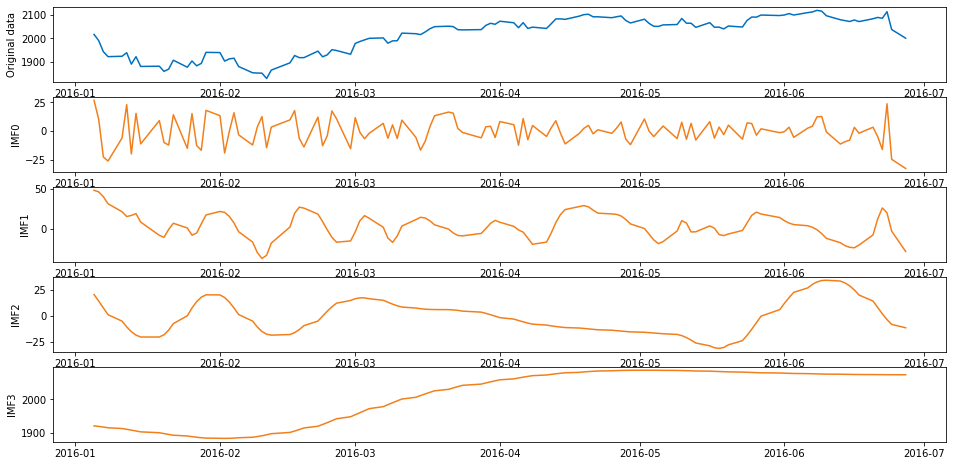

Date
2016-01-05    1990.017159
2016-01-06    1980.039760
2016-01-07    1965.537195
2016-01-08    1948.007067
2016-01-11    1929.678675
                 ...     
2016-06-21    2093.707446
2016-06-22    2101.423180
2016-06-23    2089.650270
2016-06-24    2061.883590
2016-06-27    2032.951521
Name: sum1, Length: 121, dtype: float64

In [90]:
a=emd_calculate(GSPC.iloc[1:122,0])
adecom=reconstruction(a)
adecom.iloc[1,:]

In [87]:
GSPC.iloc[1:122,0]

Date
2016-01-05    2016.709961
2016-01-06    1990.260010
2016-01-07    1943.089966
2016-01-08    1922.030029
2016-01-11    1923.670044
                 ...     
2016-06-21    2088.899902
2016-06-22    2085.449951
2016-06-23    2113.320068
2016-06-24    2037.410034
2016-06-27    2000.540039
Name: Adj Close, Length: 121, dtype: float64